In [1]:
%config Completer.use_jedi = False

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

cap = cv2.VideoCapture('../Downloads/top.mp4')
ret,current_frame = cap.read()
previous_frame = current_frame

#SURF

surf = cv2.xfeatures2d.SURF_create()

previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
kp1,des1 = surf.detectAndCompute(previous_frame_gray,None)

#LISTS
average = []
temp = 0
kernel = np.ones((5,5),dtype=np.uint8)
#CHECKING IF FRAME IS OPENED OR NOT

if cap.isOpened() == False:
    print('ERROR FILE NOT FOUND OR WRONG CODEC USED!')  
    
while(cap.isOpened()):
    if ret == True:
       
        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        
        frame_diff = cv2.absdiff(previous_frame_gray,current_frame_gray)
        ret , threshub = cv2.threshold(frame_diff,20,255,cv2.THRESH_BINARY)
        result = cv2.erode(threshub,kernel,iterations=2)
        dil_result = cv2.dilate(result,kernel,iterations=4)
        
        kp2,des2 = surf.detectAndCompute(current_frame_gray,None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1,des2,k=2)
        
        good = []

        # LESS DISTANCE == BETTER MATCH

        #RATIO MATCH1 < 75% MATCH2
        for match1,match2 in matches:
            # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH2 DISTANCE
            # THEN DESCRIPTOR WAS A GOOD MATCH , LET'S KEEP IT!
            if match1.distance < 0.75*match2.distance:
                good.append(match1)
                
                
        list_kp1 = []
        list_kp2 = []
      
        for match1 in good:
            
            img1_idx = match1.queryIdx
            img2_idx = match1.trainIdx

            (x1, y1) = kp1[img1_idx].pt
            (x2, y2) = kp2[img2_idx].pt

            if dil_result[int(y2),int(x2)] == 255:
                list_kp1.append((x1, y1))
                list_kp2.append((x2, y2))
                
        i=0
        displacement = []

        if (len(list_kp1)>0):

            for i in range(len(list_kp1)):
                p1 = list_kp1[i]
                p2 = list_kp2[i]
                distance = 0
                distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
                displacement.append(distance)
               
        
        #AVERAGE
        if len(displacement)>0: 
            avg = sum(displacement)/len(displacement)
        
        else :
            avg = 0
        
        average.append(avg)  
        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
            
    else :
        break
        
    ###TAKING REFERENCE FRAME####
            
    if temp == 10:
        previous_frame = current_frame.copy()
        previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
        kp1,des1 = surf.detectAndCompute(previous_frame_gray,None)
        temp = 0
    
    elif temp<10:
        temp += 1
        
    ret , current_frame = cap.read()

    
print(average)

    
cap.release()
cv2.destroyAllWindows()

[0, 0, 0, 7.627657984651785, 26.61909670785604, 26.612157086228553, 25.480741806597937, 143.8313145907511, 143.83405370307335, 34.252941410748555, 20.738784154097104, 0, 0, 0, 10.550539731123905, 10.563916650489812, 17.725472958705794, 16.837854206714645, 15.56314574751421, 11.06896253091305, 9.437476498122857, 63.22012668051668, 0, 0, 4.009826325935149, 4.041285817939966, 7.258156504685502, 7.258220755811755, 7.256431983310772, 127.28465477752515, 77.61293760319037, 76.21476641043564, 77.581169492816, 0, 0, 0, 12.505510337359054, 12.50387241468539, 9.951084642752148, 10.639478151771812, 21.225206282382842, 21.22198532866451, 21.216858061280117, 61.75989081473188, 0, 0, 0, 0, 3.6942118768649155, 3.691075652950784, 15.462401980810405, 15.469589552421999, 38.180992178585015, 109.90071861914664, 109.89964195779487, 0, 0, 0, 7.811106782922557, 7.817696128832645, 6.98666177540137, 6.989838933298568, 6.992911452073133, 13.836620231747391, 13.845295610047778, 226.96432052530525, 0, 0, 0, 0, 0

In [5]:
len(average)

895

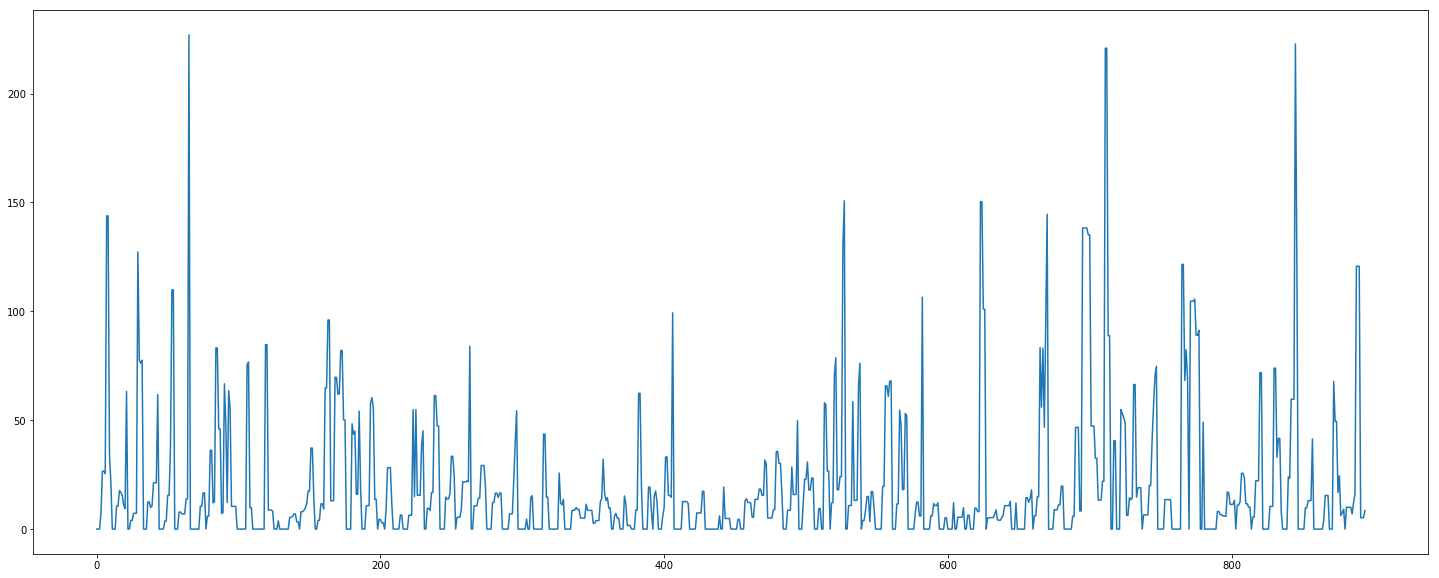

In [6]:
plt.figure(figsize=(25,10))
display(plt.plot(average ) )

In [7]:
t = len(average)
sum_average =[]
sum_avg = 0
i = 0
k=0
for i in range(t):
    if k<2:
        sum_avg = sum_avg + average[i-1]
        k += 1
    elif k>=2:
        sum_average.append(sum_avg+average[i-1])
        sum_avg = 0
        k=0
print(sum_average)

[8.51070883315144, 34.24675469250783, 195.9242134835776, 198.82577926791902, 0, 38.839929340319514, 43.4699624851419, 72.65760317863953, 8.051112143875116, 21.77280924380803, 281.11235879115117, 77.581169492816, 25.009382752044445, 41.815769076906804, 104.1987342046765, 0, 7.3852875298157, 69.11298371181742, 219.8003605769415, 7.811106782922557, 21.79419683753258, 34.674827293868304, 226.96432052530525, 0, 10.487448534954893, 43.73238189909682, 11.891456807760974, 84.48595232234865, 178.91128200963914, 99.19342748880972, 122.40860829766035, 131.54484750608404, 31.352235920020775, 10.442057927372543, 0, 75.41490220755679, 96.49782536662997, 0, 0, 0, 178.2119600754062, 25.790138363569884, 0, 3.802701368808677, 0, 5.375623663314941, 18.129224158078074, 13.750848556867712, 15.877900749562604, 29.804820061506486, 72.02709698004591, 52.113617142054245, 8.054400137845901, 32.4522207361366, 225.63797377590083, 121.92508618726784, 152.41726588492486, 206.1127709007731, 182.35421551060602, 0, 91

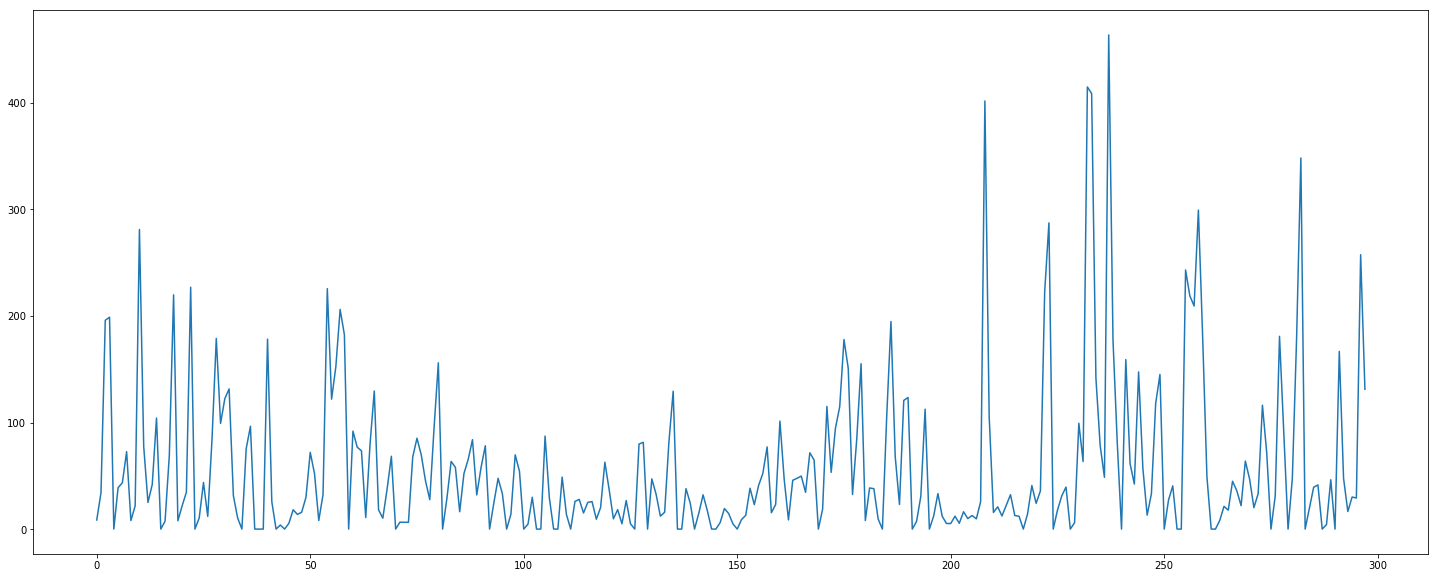

In [8]:
plt.figure(figsize=(25,10))
display(plt.plot(sum_average))

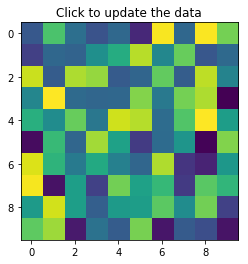

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.random((10,10))

# To make a standalone example, I'm skipping initializing the 
# `Figure` and `FigureCanvas` and using `plt.figure()` instead...
# `plt.draw()` would work for this figure, but the rest is identical.
fig, ax = plt.subplots()
ax.set(title='Click to update the data')
im = ax.imshow(data)

def update(event):
    im.set_data(np.random.random((10,10)))
    fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', update)
plt.show()

In [1]:
import matplotlib
matplotlib.use('TkAgg')

import numpy as np
import cv2
import matplotlib.pyplot as plt

fig = plt.figure()
cap = cv2.VideoCapture(0)


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)


line1, = plt.plot(x1, y1, 'ko-')        # so that we can update data later

for i in range(1000):
    # update data
    line1.set_ydata(np.cos(2 * np.pi * (x1+i*3.14/2) ) * np.exp(-x1) )

    # redraw the canvas
    fig.canvas.draw()

    # convert canvas to image
    img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
    img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # img is rgb, convert to opencv's default bgr
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)


    # display image with opencv or any operation you like
    cv2.imshow("plot",img)

    # display camera feed
    ret,frame = cap.read()
    cv2.imshow("cam",frame)

    k = cv2.waitKey(33) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
cap.release()

D:\softwares\anaconda3\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
